In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
train_image_files_path = "../Data/dataset_image/"
valid_image_files_path = "../Data/validation_image/"
test_image_files_path = "../Data/test_image/"

In [3]:
# Đọc danh sách các thư mục trong đường dẫn train_image_files_path
label = [f for f in os.listdir(train_image_files_path) if os.path.isdir(os.path.join(train_image_files_path, f))]
# label.sort()
label

['Ardeotis nigriceps',
 'Caloenas nicobarica nicobarica',
 'Ciconia episcopus',
 'Eretmochelys imbricata',
 'Graphium antiphates',
 'Lophura hatinhensis',
 'Lutrogale perspicillata',
 'Neofelis nebulosa',
 'Pavo muticus',
 'Phodilus badius',
 'Prionailurus viverrinus',
 'Rhincodon typus',
 'Saundersilarus saundersi',
 'Tragulus napu']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(
    rescale=1/255,
)
validation_data_gen = ImageDataGenerator(
    rescale=1/255,
)
test_data_gen = ImageDataGenerator(
    rescale=1/255,
)

In [5]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(200, 200),
    class_mode='categorical'  
)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),
    class_mode='categorical'  
)

test_generator = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size=(200, 200),
    class_mode='categorical'  
)

Found 4372 images belonging to 14 classes.
Found 618 images belonging to 14 classes.
Found 624 images belonging to 14 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# Define the model
model = Sequential()

#CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

#CNN2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#CNN3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten the output
model.add(Flatten())
# Hidden layer
model.add(Dense(512, activation=tf.nn.relu))
# Output layer
model.add(Dense(14, activation=tf.nn.softmax))  # 14 classes, softmax for probabilities

In [7]:
# Compile the model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model for 100 epochs, with 3 steps per epoch
EPOCHS = 100
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=3,  # Set steps_per_epoch to 3
    validation_data=validation_generator
)

Epoch 1/100


3/3 [==============================] - 15s 6s/step - loss: 6.5162 - accuracy: 0.1562 - val_loss: 4.1478 - val_accuracy: 0.1149
Epoch 2/100
3/3 [==============================] - 9s 4s/step - loss: 3.2832 - accuracy: 0.1562 - val_loss: 2.4711 - val_accuracy: 0.1181
Epoch 3/100
3/3 [==============================] - 8s 4s/step - loss: 2.3532 - accuracy: 0.1771 - val_loss: 2.4460 - val_accuracy: 0.1311
Epoch 4/100
3/3 [==============================] - 9s 4s/step - loss: 2.3910 - accuracy: 0.1979 - val_loss: 2.3130 - val_accuracy: 0.2476
Epoch 5/100
3/3 [==============================] - 9s 4s/step - loss: 2.1449 - accuracy: 0.3021 - val_loss: 2.2898 - val_accuracy: 0.2686
Epoch 6/100
3/3 [==============================] - 10s 4s/step - loss: 1.9217 - accuracy: 0.4167 - val_loss: 2.3013 - val_accuracy: 0.3479
Epoch 7/100
3/3 [==============================] - 9s 4s/step - loss: 2.1480 - accuracy: 0.3542 - val_loss: 2.0926 - val_accuracy: 0.3155
Epoch 8/100
3/3 [=============

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

20/20 [==============================] - 9s 471ms/step - loss: 0.4750 - accuracy: 0.8462
Test Loss: 0.4749639332294464
Test Accuracy: 0.8461538553237915


In [10]:
# Lưu model sau khi huấn luyện
model.save("trained_animal_model.keras")

1/1 [==============================] - 0s 100ms/step


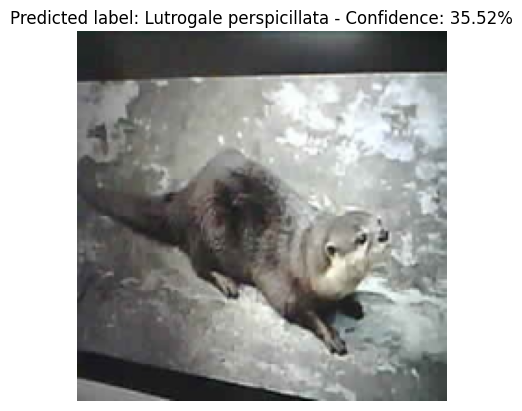

In [11]:
from PIL import Image
from tensorflow.keras.models import load_model

# Hàm dự đoán
def predict_image(image_path):
    # Load ảnh và chuyển đổi về đúng định dạng
    model = load_model("./trained_animal_model.keras")
    img = Image.open(image_path)
    img = img.resize((200, 200))
    img_array = np.array(img) / 255.0  # Rescale về 0-1

    # Thêm một chiều cho batch
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    predictions = model.predict(img_array)
    predicted_label = label[np.argmax(predictions)]
    confidence = np.max(predictions) * 100  # Độ chính xác trong phần trăm

    # Hiển thị ảnh và kết quả dự đoán
    plt.imshow(img)
    plt.title(f'Predicted label: {predicted_label} - Confidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()

file_path = '../Data/Testing/rai_ca.jpg'
predict_image(file_path)